# SVM Challenge
## Identify gender by voice

**Gender recognition by voice - identify a voice as male or female**

The dataset you are going to use comes from a Kaggle competition. It contains measurements taken on 3,168 voice recordings, and the goal is to classify a data point as male or female. 

The dataset is balanced and it contains a relatively small number of features: those are two conditions in which using SVMs could lead to good results. 

Apart from choosing the kernel and tuning the hyper parameters, you should spend some time exploring the features and selecting only the ones you think are relevant. 

The dataset is stored in the file `voice.csv`. 

To share their findings and approach, every team should prepare a very short presentation (max 4 minutes) to talk through at the end of the afternoon. 


**The Dataset**

The following acoustic properties of each voice are measured and included within the CSV:

* **meanfreq**: mean frequency (in kHz)
* **sd**: standard deviation of frequency
* **median**: median frequency (in kHz)
* **Q25**: first quantile (in kHz)
* **Q75**: third quantile (in kHz)
* **IQR**: interquantile range (in kHz)
* **skew**: skewness (see note in specprop description)
* **kurt**: kurtosis (see note in specprop description)
* **sp.ent**: spectral entropy
* **sfm**: spectral flatness
* **mode**: mode frequency
* **centroid**: frequency centroid (see specprop)
* **peakf**: peak frequency (frequency with highest energy)
* **meanfun**: average of fundamental frequency measured across acoustic signal
* **minfun**: minimum fundamental frequency measured across acoustic signal
* **maxfun**: maximum fundamental frequency measured across acoustic signal
* **meandom**: average of dominant frequency measured across acoustic signal
* **mindom**: minimum of dominant frequency measured across acoustic signal
* **maxdom**: maximum of dominant frequency measured across acoustic signal
* **dfrange**: range of dominant frequency measured across acoustic signal
* **modindx**: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* **label**: male or female

In [1]:
# import relevant libraries

import pandas as pd

from sklearn.svm import SVC
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('voice.csv')

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Enjoy!

In [5]:
df.shape

(3168, 21)

In [6]:
df.columns

Index([u'meanfreq', u'sd', u'median', u'Q25', u'Q75', u'IQR', u'skew', u'kurt',
       u'sp.ent', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label'],
      dtype='object')

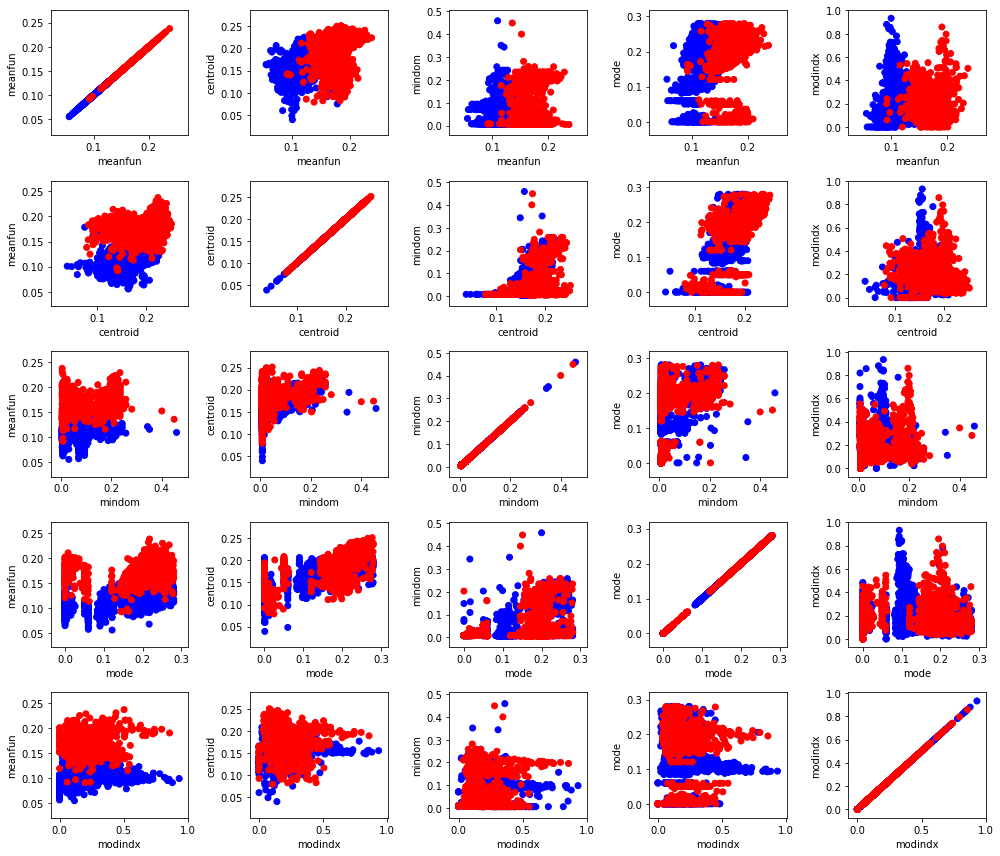

In [7]:
#let's plot a scatterplot

use_colour = {"male" : "blue", "female" : "red"}
fig = plt.figure(figsize=(14,12))

features =list(df.columns)
features.remove('label')

# Currently, selecting 5 random features to examine at random. Running this cell again will select 5 different features
# so the result of running this cell will differ every time it is run
features_to_examine = random.sample(features,5)

# we are going to examine the scatter plots of all variables in the above list with all others, this means we will
# have 5x5=25 plots. 
nfeat=len(features_to_examine)

counter=1
for j in xrange(nfeat):
    for k in xrange(nfeat):
        # subplot takes 3 arguments. 
        # If the final plot is going to be 5 x 5 subplots for example, both of these arguments must be equal to 5. 
        # The third argument should be incremented sequentially and matplotlib will then decide where to place it
        # Here, the variable "counter" is incremented at every step
        plt.subplot(nfeat, nfeat, counter)
        counter+=1
        plt.scatter(df[features_to_examine[j]],df[features_to_examine[k]], c = [use_colour[i] for i in df["label"]])
        plt.xlabel(features_to_examine[j])
        plt.ylabel(features_to_examine[k])
        fig.tight_layout()
    
plt.show()

In [39]:
index_f = df['label'] == 'female'
index_m = df['label'] == 'male'
df_f = df[index_f]
df_m = df[index_m]

In [44]:
(df_f.describe() - df_m.describe())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,0.020186,-0.015968,0.020643,0.049787,-0.003163,-0.052950,-0.310585,-23.526474,-0.044123,-0.126907,0.026519,0.020186,0.053870,0.005254,0.010012,0.200667,0.024680,1.377660,1.352981,-0.007357
std,0.003706,0.008925,-0.005243,0.017768,-0.000929,0.022509,-2.043735,-65.446825,0.018350,0.029381,-0.016849,0.003706,0.001281,0.006095,-0.014475,0.130887,0.023539,0.853757,0.855520,-0.022493
min,0.039484,-0.023384,0.024139,-0.000011,0.084690,-0.007283,-0.184298,0.141217,-0.048000,-0.044087,0.000000,0.039484,0.036347,-0.001178,0.060842,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.021406,-0.023980,0.031069,0.056687,-0.005638,-0.069854,0.500786,1.761480,-0.059773,-0.155192,0.069969,0.021406,0.053224,0.001397,0.011911,0.051396,0.015625,0.800781,0.683594,0.002016
50%,0.016388,-0.019816,0.017613,0.053058,-0.004373,-0.067250,0.555388,2.637547,-0.051448,-0.184408,0.036113,0.016388,0.052154,0.010846,0.003099,0.180718,0.000000,1.585938,1.535156,-0.000909
75%,0.021388,-0.010463,0.013852,0.059199,-0.003333,-0.058063,0.440929,2.166043,-0.027491,-0.098780,-0.009965,0.021388,0.053596,0.000962,0.000000,0.305984,0.109375,2.572266,2.531250,-0.010648
max,0.025542,0.019243,0.012384,0.020607,0.004545,0.056058,0.187966,38.259259,-0.003515,0.011589,0.000000,0.025542,0.058586,0.082870,0.000044,0.152437,-0.009766,-0.070312,-0.070312,-0.074610


In [38]:
np.cov(df[features_to_examine].T)

array([[  2.77297333e-04,  -2.79014328e-02,  -1.10613994e-04,
         -6.80277166e-04,  -3.40643569e-04],
       [ -2.79014328e-02,   1.23906754e+01,   2.14118666e-02,
          1.28751959e-01,   5.57547124e-02],
       [ -1.10613994e-04,   2.14118666e-02,   3.69406561e-04,
          5.71971126e-04,   2.35929820e-04],
       [ -6.80277166e-04,   1.28751959e-01,   5.71971126e-04,
          5.96030535e-03,   1.90163011e-03],
       [ -3.40643569e-04,   5.57547124e-02,   2.35929820e-04,
          1.90163011e-03,   1.32206024e-03]])

In [13]:
train_features = features
features

['Q25',
 'IQR',
 'kurt',
 'sfm',
 'centroid',
 'minfun',
 'meandom',
 'maxdom',
 'modindx']

In [28]:
features = list(df.columns)
features.remove('label')
# features.remove('kurt')
features

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

True

In [61]:
features = list(df.columns)
features.remove('label')
features.remove('kurt')
features.remove('maxdom')
features.remove('dfrange')
features.remove('skew')
features.remove('sfm')
features.remove('meandom')
features.remove('mindom')
features.remove('sp.ent')
features.remove('meanfreq')
features.remove('Q75')
features.remove('sd')
features.remove('Q25')
features.remove('modindx')
features.remove('median')
features.remove('mode')
features.remove('IQR')
features.remove('centroid')
features.remove('maxfun')

score0 = 0
keyout_features = features
for k in features:
    print(k)
    train_features = list(df.columns)
    train_features.remove('label')
    train_features.remove('kurt')
    train_features.remove('maxdom')
    train_features.remove('dfrange')
    train_features.remove('skew')
    train_features.remove('sfm')
    train_features.remove('meandom')
    train_features.remove('mindom')
    train_features.remove('sp.ent')
    train_features.remove('meanfreq')
    train_features.remove('Q75')
    train_features.remove('sd')
    train_features.remove('Q25')
    train_features.remove('modindx')
    train_features.remove('median')
    train_features.remove('mode')
    train_features.remove('IQR')
    train_features.remove('centroid')
    train_features.remove('maxfun')
    
    train_features.remove(k)
    #print(train_features)
    X = df[train_features]
    Y = df['label']
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
    
    clf = SVC()
    clf.fit(X_train,Y_train)
    score = clf.score(X_test,Y_test)
    if score > score0:
        score0 = score
        keyout_features = k

print(score0,keyout_features)


meanfun
minfun
(0.95162986330178756, 'minfun')


In [60]:
X = df[train_features]
Y = df['label']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [32]:
SVC?

In [33]:
clf = SVC()
clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
clf.score(X_test,Y_test)

0.71293375394321767

In [45]:
sklearn.svm?

Object `sklearn.svm` not found.


In [10]:
import sklearn

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
features = list(df.columns)
features.remove('label')
features

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

In [98]:
#X = df[features]
features = ['meanfreq','sd','Q25','IQR','sfm','meanfun']
X = df[features]
Y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [99]:
RF.feature_importances_

array([ 0.02006879,  0.2156086 ,  0.0615731 ,  0.16852553,  0.07169834,
        0.46252564])

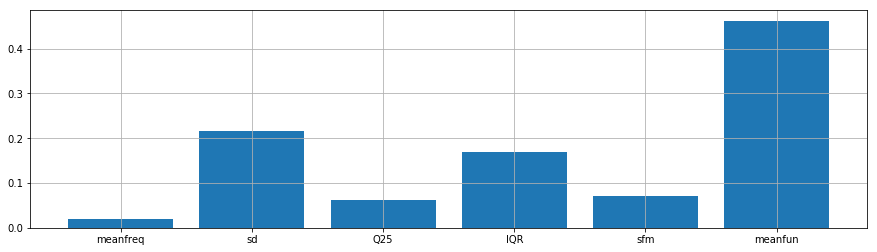

In [100]:
plt.figure(figsize=(15,4))
plt.bar(range(len(features)),list(RF.feature_importances_))
plt.xticks(range(len(features)),features)
plt.grid()
plt.show()

In [101]:
RF.score(X_test,Y_test)

0.97055730809674023

In [110]:
X = df[['sd','IQR','sfm','meanfun']]
Y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
    
clf = sklearn.svm.LinearSVC()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.95268138801261826